# IMDB-Capstone Machine learning

#### 1) Now make only 1 data frame of two CSV files using the join operation of pandas and start doing EDA.

<b>importing libraries<b>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import zscore
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import Lasso
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore")

<b>loading the dataset<b>

In [4]:
df1=pd.read_csv("data1.csv")
df1

,S No.,MovieName,Duration,Year,Rating,Metascore,Director1,Director2,Director3
0,1,The Dark Knight,152,2008,9.0,84,Christopher Nolan,NaN,NaN
1,2,The Lord of the Rings: The Return of the King,201,2003,9.0,94,Peter Jackson,NaN,NaN
2,3,Spider-Man: Across the Spider-Verse,140,2023,8.9,86,Joaquim Dos Santos,Kemp Powers,Justin K. Thompson
3,4,Inception,148,2010,8.8,74,Christopher Nolan,NaN,NaN
4,5,The Lord of the Rings: The Fellowship of the Ring,178,2001,8.8,92,Peter Jackson,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1752,"1,753",Radhe,109,2021,1.9,Nan,Prabhu Deva,NaN,NaN
1753,"1,754",Race 3,160,2018,1.9,Nan,Remo D'Souza,NaN,NaN
1754,"1,755",Angels Apocalypse,85,2015,1.6,Nan,Sean Cain,Enzo Zelocchi,NaN
1755,"1,756",The Cost of Deception,125,2021,1.5,Nan,Keith English,NaN,NaN


In [5]:
df2=pd.read_csv("data2.csv")
df2

,MovieName,Star1,Star2,Star3,Star4,Genre1,Genre2,Genre3,GrossCollection,Certification,votes
0,The Dark Knight,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,Action,Crime,Drama,534.86,PG-13,"27,31,198"
1,The Lord of the Rings: The Return of the King,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,Action,Adventure,Drama,377.85,PG-13,"18,93,924"
2,Spider-Man: Across the Spider-Verse,Shameik Moore,Hailee Steinfeld,Brian Tyree Henry,Luna Lauren Velez,Animation,Action,Adventure,Nan,PG,"1,59,401"
3,Inception,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,Action,Adventure,Sci-Fi,292.58,PG-13,"24,23,720"
4,The Lord of the Rings: The Fellowship of the Ring,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean,Action,Adventure,Drama,315.54,PG-13,"19,22,392"
...,...,...,...,...,...,...,...,...,...,...,...
1752,Radhe,Salman Khan,Disha Patani,Randeep Hooda,Jackie Shroff,Action,Crime,Thriller,Nan,TV-MA,"1,78,978"
1753,Race 3,Anil Kapoor,Salman Khan,Bobby Deol,Jacqueline Fernandez,Action,Crime,Thriller,1.69,Not Rated,"47,751"
1754,Angels Apocalypse,Enzo Zelocchi,Jana Rochelle,Ryan C.F. Buckley,William Kirkham,Action,Fantasy,Sci-Fi,Nan,Nan,"42,920"
1755,The Cost of Deception,Vivianne Bánovits,András Mózes,Barna Bokor,Gabriella Gubás,Action,Crime,Drama,Nan,Nan,"39,592"


In [6]:
dfall = pd.merge(df1, df2, on ='MovieName')
dfall

,S No.,MovieName,Duration,Year,Rating,Metascore,Director1,Director2,Director3,Star1,Star2,Star3,Star4,Genre1,Genre2,Genre3,GrossCollection,Certification,votes
0,1,The Dark Knight,152,2008,9.0,84,Christopher Nolan,NaN,NaN,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,Action,Crime,Drama,534.86,PG-13,"27,31,198"
1,2,The Lord of the Rings: The Return of the King,201,2003,9.0,94,Peter Jackson,NaN,NaN,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,Action,Adventure,Drama,377.85,PG-13,"18,93,924"
2,3,Spider-Man: Across the Spider-Verse,140,2023,8.9,86,Joaquim Dos Santos,Kemp Powers,Justin K. Thompson,Shameik Moore,Hailee Steinfeld,Brian Tyree Henry,Luna Lauren Velez,Animation,Action,Adventure,Nan,PG,"1,59,401"
3,4,Inception,148,2010,8.8,74,Christopher Nolan,NaN,NaN,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,Action,Adventure,Sci-Fi,292.58,PG-13,"24,23,720"
4,5,The Lord of the Rings: The Fellowship of the Ring,178,2001,8.8,92,Peter Jackson,NaN,NaN,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean,Action,Adventure,Drama,315.54,PG-13,"19,22,392"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1838,"1,753",Radhe,109,2021,1.9,Nan,Prabhu Deva,NaN,NaN,Salman Khan,Disha Patani,Randeep Hooda,Jackie Shroff,Action,Crime,Thriller,Nan,TV-MA,"1,78,978"
1839,"1,754",Race 3,160,2018,1.9,Nan,Remo D'Souza,NaN,NaN,Anil Kapoor,Salman Khan,Bobby Deol,Jacqueline Fernandez,Action,Crime,Thriller,1.69,Not Rated,"47,751"
1840,"1,755",Angels Apocalypse,85,2015,1.6,Nan,Sean Cain,Enzo Zelocchi,NaN,Enzo Zelocchi,Jana Rochelle,Ryan C.F. Buckley,William Kirkham,Action,Fantasy,Sci-Fi,Nan,Nan,"42,920"
1841,"1,756",The Cost of Deception,125,2021,1.5,Nan,Keith English,NaN,NaN,Vivianne Bánovits,András Mózes,Barna Bokor,Gabriella Gubás,Action,Crime,Drama,Nan,Nan,"39,592"


### 2) Do the complete EDA in detail to explore the insights of data and write detailed observations of each analysis.

# EDA

In [7]:
dfall.head(3)

,S No.,MovieName,Duration,Year,Rating,Metascore,Director1,Director2,Director3,Star1,Star2,Star3,Star4,Genre1,Genre2,Genre3,GrossCollection,Certification,votes
0,1,The Dark Knight,152,2008,9.0,84,Christopher Nolan,NaN,NaN,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,Action,Crime,Drama,534.86,PG-13,"27,31,198"
1,2,The Lord of the Rings: The Return of the King,201,2003,9.0,94,Peter Jackson,NaN,NaN,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,Action,Adventure,Drama,377.85,PG-13,"18,93,924"
2,3,Spider-Man: Across the Spider-Verse,140,2023,8.9,86,Joaquim Dos Santos,Kemp Powers,Justin K. Thompson,Shameik Moore,Hailee Steinfeld,Brian Tyree Henry,Luna Lauren Velez,Animation,Action,Adventure,Nan,PG,"1,59,401"


In [8]:
dfall.head

<bound method NDFrame.head of       S No.                                          MovieName  Duration  \
0         1                                    The Dark Knight       152   
1         2      The Lord of the Rings: The Return of the King       201   
2         3                Spider-Man: Across the Spider-Verse       140   
3         4                                          Inception       148   
4         5  The Lord of the Rings: The Fellowship of the Ring       178   
...     ...                                                ...       ...   
1838  1,753                                              Radhe       109   
1839  1,754                                             Race 3       160   
1840  1,755                                  Angels Apocalypse        85   
1841  1,756                              The Cost of Deception       125   
1842  1,757                                            Sadak 2       133   

      Year  Rating Metascore           Director1        D

In [9]:
dfall.tail(3)

,S No.,MovieName,Duration,Year,Rating,Metascore,Director1,Director2,Director3,Star1,Star2,Star3,Star4,Genre1,Genre2,Genre3,GrossCollection,Certification,votes
1840,"1,755",Angels Apocalypse,85,2015,1.6,Nan,Sean Cain,Enzo Zelocchi,NaN,Enzo Zelocchi,Jana Rochelle,Ryan C.F. Buckley,William Kirkham,Action,Fantasy,Sci-Fi,Nan,Nan,"42,920"
1841,"1,756",The Cost of Deception,125,2021,1.5,Nan,Keith English,NaN,NaN,Vivianne Bánovits,András Mózes,Barna Bokor,Gabriella Gubás,Action,Crime,Drama,Nan,Nan,"39,592"
1842,"1,757",Sadak 2,133,2020,1.2,Nan,Mahesh Bhatt,NaN,NaN,Alia Bhatt,Pooja Bhatt,Aditya Roy Kapoor,Sanjay Dutt,Action,Drama,Nan,Nan,TV-MA,"96,320"


In [10]:
dfall.tail

<bound method NDFrame.tail of       S No.                                          MovieName  Duration  \
0         1                                    The Dark Knight       152   
1         2      The Lord of the Rings: The Return of the King       201   
2         3                Spider-Man: Across the Spider-Verse       140   
3         4                                          Inception       148   
4         5  The Lord of the Rings: The Fellowship of the Ring       178   
...     ...                                                ...       ...   
1838  1,753                                              Radhe       109   
1839  1,754                                             Race 3       160   
1840  1,755                                  Angels Apocalypse        85   
1841  1,756                              The Cost of Deception       125   
1842  1,757                                            Sadak 2       133   

      Year  Rating Metascore           Director1        D

In [11]:
dfall.sample()

,S No.,MovieName,Duration,Year,Rating,Metascore,Director1,Director2,Director3,Star1,Star2,Star3,Star4,Genre1,Genre2,Genre3,GrossCollection,Certification,votes
654,597,Crank,88,2006,6.9,57,Mark Neveldine,Brian Taylor,NaN,Jason Statham,Amy Smart,Carlos Sanz,Jose Pablo Cantillo,Action,Crime,Thriller,27.83,R,"2,56,315"


In [12]:
dfall.sample

<bound method NDFrame.sample of       S No.                                          MovieName  Duration  \
0         1                                    The Dark Knight       152   
1         2      The Lord of the Rings: The Return of the King       201   
2         3                Spider-Man: Across the Spider-Verse       140   
3         4                                          Inception       148   
4         5  The Lord of the Rings: The Fellowship of the Ring       178   
...     ...                                                ...       ...   
1838  1,753                                              Radhe       109   
1839  1,754                                             Race 3       160   
1840  1,755                                  Angels Apocalypse        85   
1841  1,756                              The Cost of Deception       125   
1842  1,757                                            Sadak 2       133   

      Year  Rating Metascore           Director1       

In [13]:
dfall.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1843 entries, 0 to 1842
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   S No.            1843 non-null   object 
 1   MovieName        1843 non-null   object 
 2   Duration         1843 non-null   int64  
 3   Year             1843 non-null   int64  
 4   Rating           1843 non-null   float64
 5   Metascore        1843 non-null   object 
 6   Director1        1843 non-null   object 
 7   Director2        113 non-null    object 
 8   Director3        13 non-null     object 
 9   Star1            1843 non-null   object 
 10  Star2            1843 non-null   object 
 11  Star3            1843 non-null   object 
 12  Star4            1843 non-null   object 
 13  Genre1           1843 non-null   object 
 14  Genre2           1843 non-null   object 
 15  Genre3           1843 non-null   object 
 16  GrossCollection  1843 non-null   object 
 17  Certification 

In [14]:
dfall.info

<bound method DataFrame.info of       S No.                                          MovieName  Duration  \
0         1                                    The Dark Knight       152   
1         2      The Lord of the Rings: The Return of the King       201   
2         3                Spider-Man: Across the Spider-Verse       140   
3         4                                          Inception       148   
4         5  The Lord of the Rings: The Fellowship of the Ring       178   
...     ...                                                ...       ...   
1838  1,753                                              Radhe       109   
1839  1,754                                             Race 3       160   
1840  1,755                                  Angels Apocalypse        85   
1841  1,756                              The Cost of Deception       125   
1842  1,757                                            Sadak 2       133   

      Year  Rating Metascore           Director1       

In [15]:
dfall.dtypes

S No.               object
MovieName           object
Duration             int64
Year                 int64
Rating             float64
Metascore           object
Director1           object
Director2           object
Director3           object
Star1               object
Star2               object
Star3               object
Star4               object
Genre1              object
Genre2              object
Genre3              object
GrossCollection     object
Certification       object
votes               object
dtype: object

In [16]:
df1.shape

(1757, 9)

In [17]:
dfall.shape

(1843, 19)

### five column stars, votes , genre , Gross collection , Certification has been added to the database

In [18]:
dfall

,S No.,MovieName,Duration,Year,Rating,Metascore,Director1,Director2,Director3,Star1,Star2,Star3,Star4,Genre1,Genre2,Genre3,GrossCollection,Certification,votes
0,1,The Dark Knight,152,2008,9.0,84,Christopher Nolan,NaN,NaN,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,Action,Crime,Drama,534.86,PG-13,"27,31,198"
1,2,The Lord of the Rings: The Return of the King,201,2003,9.0,94,Peter Jackson,NaN,NaN,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,Action,Adventure,Drama,377.85,PG-13,"18,93,924"
2,3,Spider-Man: Across the Spider-Verse,140,2023,8.9,86,Joaquim Dos Santos,Kemp Powers,Justin K. Thompson,Shameik Moore,Hailee Steinfeld,Brian Tyree Henry,Luna Lauren Velez,Animation,Action,Adventure,Nan,PG,"1,59,401"
3,4,Inception,148,2010,8.8,74,Christopher Nolan,NaN,NaN,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,Action,Adventure,Sci-Fi,292.58,PG-13,"24,23,720"
4,5,The Lord of the Rings: The Fellowship of the Ring,178,2001,8.8,92,Peter Jackson,NaN,NaN,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean,Action,Adventure,Drama,315.54,PG-13,"19,22,392"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1838,"1,753",Radhe,109,2021,1.9,Nan,Prabhu Deva,NaN,NaN,Salman Khan,Disha Patani,Randeep Hooda,Jackie Shroff,Action,Crime,Thriller,Nan,TV-MA,"1,78,978"
1839,"1,754",Race 3,160,2018,1.9,Nan,Remo D'Souza,NaN,NaN,Anil Kapoor,Salman Khan,Bobby Deol,Jacqueline Fernandez,Action,Crime,Thriller,1.69,Not Rated,"47,751"
1840,"1,755",Angels Apocalypse,85,2015,1.6,Nan,Sean Cain,Enzo Zelocchi,NaN,Enzo Zelocchi,Jana Rochelle,Ryan C.F. Buckley,William Kirkham,Action,Fantasy,Sci-Fi,Nan,Nan,"42,920"
1841,"1,756",The Cost of Deception,125,2021,1.5,Nan,Keith English,NaN,NaN,Vivianne Bánovits,András Mózes,Barna Bokor,Gabriella Gubás,Action,Crime,Drama,Nan,Nan,"39,592"


In [19]:
print('No of Rows:',dfall.shape[0])
print('No of Columns:',dfall.shape[1])
dfall.head(3)

No of Rows: 1843
No of Columns: 19


,S No.,MovieName,Duration,Year,Rating,Metascore,Director1,Director2,Director3,Star1,Star2,Star3,Star4,Genre1,Genre2,Genre3,GrossCollection,Certification,votes
0,1,The Dark Knight,152,2008,9.0,84,Christopher Nolan,NaN,NaN,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,Action,Crime,Drama,534.86,PG-13,"27,31,198"
1,2,The Lord of the Rings: The Return of the King,201,2003,9.0,94,Peter Jackson,NaN,NaN,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,Action,Adventure,Drama,377.85,PG-13,"18,93,924"
2,3,Spider-Man: Across the Spider-Verse,140,2023,8.9,86,Joaquim Dos Santos,Kemp Powers,Justin K. Thompson,Shameik Moore,Hailee Steinfeld,Brian Tyree Henry,Luna Lauren Velez,Animation,Action,Adventure,Nan,PG,"1,59,401"


In [20]:
dfall.columns

Index(['S No.', 'MovieName', 'Duration', 'Year', 'Rating', 'Metascore',
       'Director1', 'Director2', 'Director3', 'Star1', 'Star2', 'Star3',
       'Star4', 'Genre1', 'Genre2', 'Genre3', 'GrossCollection',
       'Certification', 'votes'],
      dtype='object')

In [21]:
dfall.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1843 entries, 0 to 1842
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   S No.            1843 non-null   object 
 1   MovieName        1843 non-null   object 
 2   Duration         1843 non-null   int64  
 3   Year             1843 non-null   int64  
 4   Rating           1843 non-null   float64
 5   Metascore        1843 non-null   object 
 6   Director1        1843 non-null   object 
 7   Director2        113 non-null    object 
 8   Director3        13 non-null     object 
 9   Star1            1843 non-null   object 
 10  Star2            1843 non-null   object 
 11  Star3            1843 non-null   object 
 12  Star4            1843 non-null   object 
 13  Genre1           1843 non-null   object 
 14  Genre2           1843 non-null   object 
 15  Genre3           1843 non-null   object 
 16  GrossCollection  1843 non-null   object 
 17  Certification 

In [22]:
dfall.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1843 entries, 0 to 1842
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   S No.            1843 non-null   object 
 1   MovieName        1843 non-null   object 
 2   Duration         1843 non-null   int64  
 3   Year             1843 non-null   int64  
 4   Rating           1843 non-null   float64
 5   Metascore        1843 non-null   object 
 6   Director1        1843 non-null   object 
 7   Director2        113 non-null    object 
 8   Director3        13 non-null     object 
 9   Star1            1843 non-null   object 
 10  Star2            1843 non-null   object 
 11  Star3            1843 non-null   object 
 12  Star4            1843 non-null   object 
 13  Genre1           1843 non-null   object 
 14  Genre2           1843 non-null   object 
 15  Genre3           1843 non-null   object 
 16  GrossCollection  1843 non-null   object 
 17  Certification 

# Statistical Analysis

In [23]:
dfall.nunique()

S No.              1757
MovieName          1716
Duration            118
Year                 74
Rating               68
Metascore            87
Director1           949
Director2            90
Director3            13
Star1               728
Star2              1169
Star3              1332
Star4              1451
Genre1                2
Genre2               15
Genre3               19
GrossCollection    1360
Certification        17
votes              1747
dtype: int64

### Data Integrity Check

In [24]:
dfall.duplicated().sum()

0

<b>there is no duplicate values<b>

In [25]:
dfall.replace("Nan", np.nan, inplace=True)

In [26]:
dfall.isnull().sum()

S No.                 0
MovieName             0
Duration              0
Year                  0
Rating                0
Metascore           194
Director1             0
Director2          1730
Director3          1830
Star1                 0
Star2                 1
Star3                 1
Star4                 2
Genre1                0
Genre2                2
Genre3              148
GrossCollection     294
Certification        10
votes                 0
dtype: int64

#### Dropping off columns Director 2 and Director 3 as maxiumum entries are null values.

In [27]:
dfall.drop(["Director2","Director3"], axis=1, inplace=True)

Using mode to fill null values for object columns - Metascore, Certification and genre 3

In [28]:
dfall['Metascore']=dfall['Metascore'].fillna(dfall['Metascore'].mode()[0])
dfall['Certification'] = dfall['Certification'].fillna(dfall['Certification'].mode()[0])
dfall['Genre3'] =dfall['Genre3'].fillna(dfall['Genre3'].mode()[0])

First we converted column Gross collection to float dataype and then used mean to fill null values.

In [29]:
dfall['GrossCollection'] = dfall['GrossCollection'].astype(float)
dfall['GrossCollection'] = dfall['GrossCollection'].fillna(dfall['GrossCollection'].mean())

In [30]:
dfall.isnull().sum().sum()

6

In [31]:
dfall.dropna(inplace=True)

In [32]:
dfall.isnull().sum().sum()

0

In [33]:
dfall.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1839 entries, 0 to 1842
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   S No.            1839 non-null   object 
 1   MovieName        1839 non-null   object 
 2   Duration         1839 non-null   int64  
 3   Year             1839 non-null   int64  
 4   Rating           1839 non-null   float64
 5   Metascore        1839 non-null   object 
 6   Director1        1839 non-null   object 
 7   Star1            1839 non-null   object 
 8   Star2            1839 non-null   object 
 9   Star3            1839 non-null   object 
 10  Star4            1839 non-null   object 
 11  Genre1           1839 non-null   object 
 12  Genre2           1839 non-null   object 
 13  Genre3           1839 non-null   object 
 14  GrossCollection  1839 non-null   float64
 15  Certification    1839 non-null   object 
 16  votes            1839 non-null   object 
dtypes: float64(2),

Treating all columns which should be integer datatype but are object datatype.

In [34]:
dfall['Metascore'] = dfall['Metascore'].astype(int)
dfall['votes'] = dfall['votes'].str.replace(',', '').astype(int)
dfall['S No.'] = dfall['S No.'].str.replace(',', '').astype(int)

<b>Let check how many question mark (" ?") inside dataset.<b>

In [35]:
dfall.isin([' ?']).sum()

S No.              0
MovieName          0
Duration           0
Year               0
Rating             0
Metascore          0
Director1          0
Star1              0
Star2              0
Star3              0
Star4              0
Genre1             0
Genre2             0
Genre3             0
GrossCollection    0
Certification      0
votes              0
dtype: int64

### check null value

In [36]:
missing_values = dfall.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(dfall))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                 Missing Values  % Missing data
S No.                         0             0.0
Star3                         0             0.0
Certification                 0             0.0
GrossCollection               0             0.0
Genre3                        0             0.0
Genre2                        0             0.0
Genre1                        0             0.0
Star4                         0             0.0
Star2                         0             0.0
MovieName                     0             0.0
Star1                         0             0.0
Director1                     0             0.0
Metascore                     0             0.0
Rating                        0             0.0
Year                          0             0.0
Duration                      0             0.0
votes                         0             0.0


<Axes: >

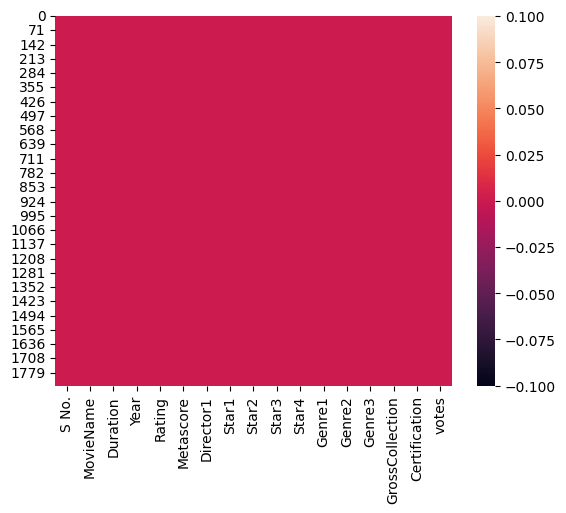

In [37]:
sns.heatmap(dfall.isnull())

<b>There is no missing data<b>

In [38]:
dfall.columns

Index(['S No.', 'MovieName', 'Duration', 'Year', 'Rating', 'Metascore',
       'Director1', 'Star1', 'Star2', 'Star3', 'Star4', 'Genre1', 'Genre2',
       'Genre3', 'GrossCollection', 'Certification', 'votes'],
      dtype='object')

Duration

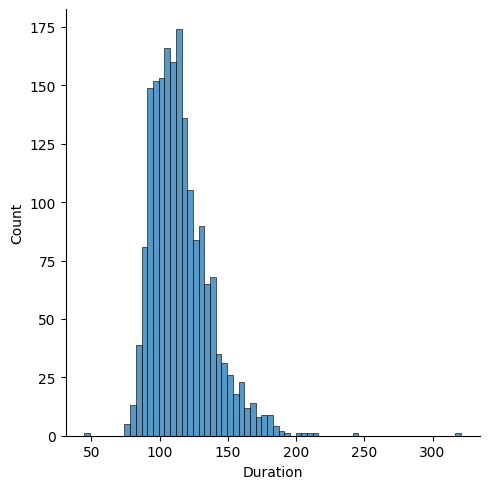

In [39]:
sns.displot(data=dfall, x="Duration")

alMost movies are 90 to 120 minutes long.

year

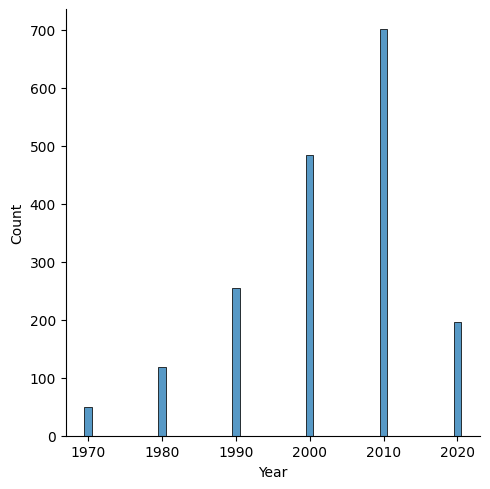

In [40]:
# Number of movies launched in the decades
sns.displot(pd.cut(dfall['Year'], bins=range(1970, 2031, 10), right=False, labels=range(1970, 2030, 10)))
plt.show()

rating according to the year wise

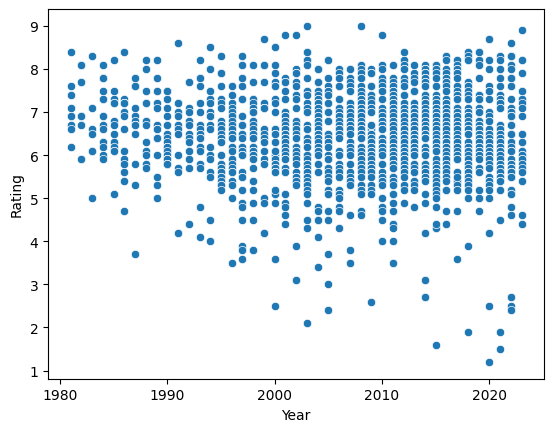

In [41]:
sns.scatterplot(x=dfall["Year"][dfall["Year"]>1980],y=dfall["Rating"])
plt.show()

Metascore

Genre

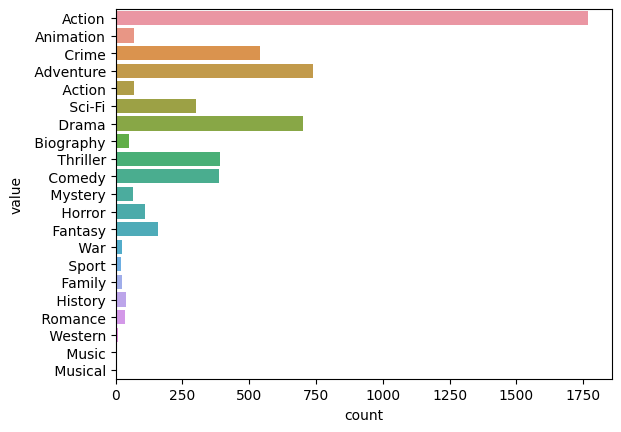

In [42]:
sns.countplot(data=pd.melt(dfall, value_vars=["Genre1", "Genre2", "Genre3"]), y="value")
plt.show()

Certification

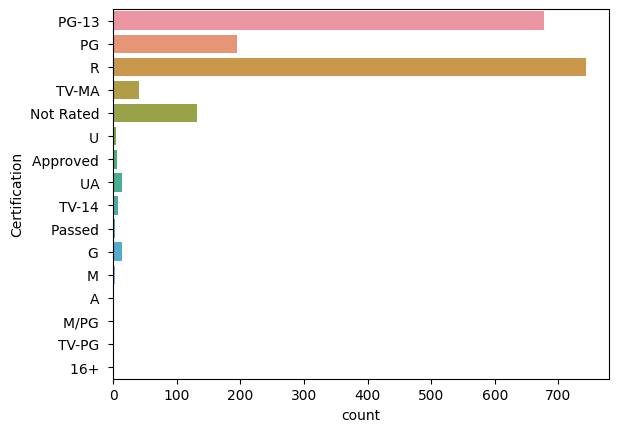

In [43]:
sns.countplot(y=dfall["Certification"])
plt.show()

mostly all the movies has a PG-13 certification

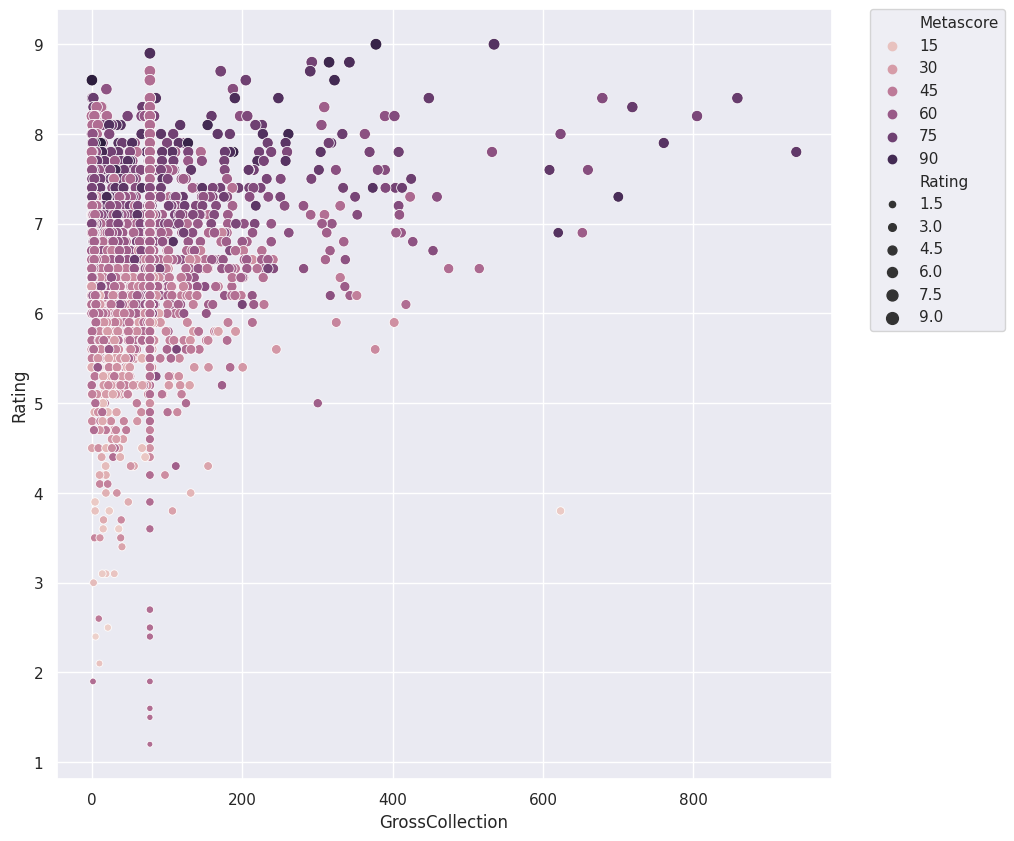

In [44]:
sns.set(font_scale=1)
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.scatterplot(x="GrossCollection", y="Rating",
                      hue="Metascore", size="Rating",
                      data=dfall)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Higher rated movies have been found to have higher gross collection.
Even with high rating and metascore, movies have been found to be grossing below average.

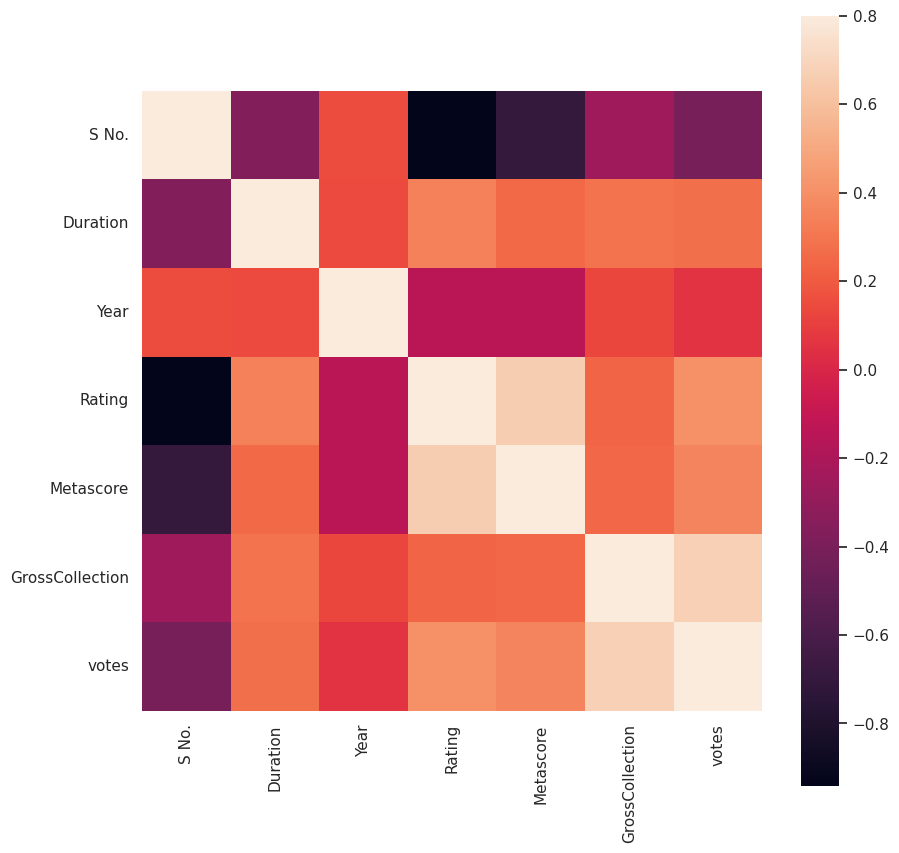

In [45]:
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(dfall.corr(), vmax=.8, square=True)
plt.show()

columns which are not useful for machine learning

In [46]:
dfall.columns

Index(['S No.', 'MovieName', 'Duration', 'Year', 'Rating', 'Metascore',
       'Director1', 'Star1', 'Star2', 'Star3', 'Star4', 'Genre1', 'Genre2',
       'Genre3', 'GrossCollection', 'Certification', 'votes'],
      dtype='object')

In [47]:
df3=dfall.drop(["S No.","MovieName",], axis=1)

# Encoding the categorical data

In [48]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df3['Director1']=le.fit_transform(df3['Director1'])
df3['Star1']=le.fit_transform(df3['Star1'])
df3['Star2']=le.fit_transform(df3['Star2'])
df3['Star3']=le.fit_transform(df3['Star3'])
df3['Star4']=le.fit_transform(df3['Star4'])
df3['Genre1']=le.fit_transform(df3['Genre1'])
df3['Genre2']=le.fit_transform(df3['Genre2'])
df3['Genre3']=le.fit_transform(df3['Genre3'])
df3['Certification']=le.fit_transform(df3['Certification'])

In [49]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1839 entries, 0 to 1842
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Duration         1839 non-null   int64  
 1   Year             1839 non-null   int64  
 2   Rating           1839 non-null   float64
 3   Metascore        1839 non-null   int64  
 4   Director1        1839 non-null   int64  
 5   Star1            1839 non-null   int64  
 6   Star2            1839 non-null   int64  
 7   Star3            1839 non-null   int64  
 8   Star4            1839 non-null   int64  
 9   Genre1           1839 non-null   int64  
 10  Genre2           1839 non-null   int64  
 11  Genre3           1839 non-null   int64  
 12  GrossCollection  1839 non-null   float64
 13  Certification    1839 non-null   int64  
 14  votes            1839 non-null   int64  
dtypes: float64(2), int64(13)
memory usage: 294.4 KB


All columns have been converted into integer or float datatype

# Outliers

In [50]:
z=np.abs(zscore(df3))
dfn=df3[(z<3).all(axis=1)]
dfn

,Duration,Year,Rating,Metascore,Director1,Star1,Star2,Star3,Star4,Genre1,Genre2,Genre3,GrossCollection,Certification,votes
8,153,2020,8.7,51,864,642,868,95,1370,0,5,4,77.337837,12,119816
19,137,1986,8.4,84,367,620,763,178,1049,0,1,13,85.160000,10,734908
20,101,2003,8.4,77,659,111,1150,643,743,0,5,11,0.710000,10,599065
21,101,2003,8.4,77,659,343,311,1106,1240,0,5,11,2.190000,10,78524
22,104,2013,5.8,49,834,111,1150,643,743,0,5,11,0.710000,10,599065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,95,1997,3.6,11,449,567,1053,504,1212,0,1,6,35.930000,8,56600
1822,99,2017,3.6,51,26,571,341,966,1054,0,5,4,77.337837,10,33488
1823,98,1996,3.5,40,193,513,48,15,280,0,10,4,3.790000,10,30393
1824,89,2011,3.5,37,760,310,506,581,1178,0,1,2,38.540000,7,27109


In [51]:
df3

,Duration,Year,Rating,Metascore,Director1,Star1,Star2,Star3,Star4,Genre1,Genre2,Genre3,GrossCollection,Certification,votes
0,152,2008,9.0,84,152,121,411,2,906,0,4,4,534.860000,8,2731198
1,201,2003,9.0,94,686,187,1104,467,1024,0,1,4,377.850000,8,1893924
2,140,2023,8.9,86,412,615,400,156,832,1,0,0,77.337837,7,159401
3,148,2010,8.8,74,152,416,564,355,728,0,1,13,292.580000,8,2423720
4,178,2001,8.8,92,686,187,429,943,1230,0,1,4,315.540000,8,1922392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1838,109,2021,1.9,51,705,585,277,1011,521,0,4,15,77.337837,12,178978
1839,160,2018,1.9,51,725,44,975,144,523,0,4,15,1.690000,6,47751
1840,85,2015,1.6,51,811,195,467,1086,1418,0,7,13,77.337837,10,42920
1841,125,2021,1.5,51,499,700,60,111,413,0,4,4,77.337837,10,39592


In [52]:
(1825-1546)*100/1825

15.287671232876713

15.28 % has been removed in outlier treatment, which is under considerable range.

# Skewness

In [53]:
dfn.skew()

Duration           0.831534
Year              -0.928484
Rating            -0.278375
Metascore          0.111713
Director1         -0.141936
Star1              0.042227
Star2             -0.023221
Star3              0.014219
Star4              0.024263
Genre1             0.000000
Genre2             1.387726
Genre3             0.367384
GrossCollection    1.792992
Certification     -0.223668
votes              1.952751
dtype: float64

In [54]:
from sklearn.preprocessing import power_transform

for i in dfn.drop(["GrossCollection","votes"],axis=1).columns:
    if abs(dfn[f'{i}'].skew())>0.5:
        dfn[[f'{i}']]=power_transform(dfn[[f'{i}']],method='yeo-johnson')
        print("treated skewness for :",i)
    else:
        continue

treated skewness for : Duration
treated skewness for : Year
treated skewness for : Genre2


In [55]:
dfn.skew()

Duration           0.021788
Year              -0.372417
Rating            -0.278375
Metascore          0.111713
Director1         -0.141936
Star1              0.042227
Star2             -0.023221
Star3              0.014219
Star4              0.024263
Genre1             0.000000
Genre2             0.074259
Genre3             0.367384
GrossCollection    1.792992
Certification     -0.223668
votes              1.952751
dtype: float64

Skewness has been removed from all the required columns

# Phase 4

#### 1) Write the complete Machine learning code to make predictions of votes and gross collection. Use appropriate models on their label basis. Remember you need to make 2 different predictions: vote and gross collection.

#### 2) Apply all the best techniques of scaling, and hyperparameter tuning, and avoid underfitting or overfitting (bias/variance)

#### 3) At the end save the best model and convey on which basis you have chosen that model.  

# model for Gross Collection.

#### Scaling of Independent

In [56]:
X=dfn.drop(["GrossCollection"],axis=1)
y=dfn["GrossCollection"]
st=StandardScaler()
xf=st.fit_transform(X)
x=pd.DataFrame(data=xf, columns=X.columns)

#### Predicting the best random state

In [57]:
LR = LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=i)
    LR.fit(x_train,y_train)
    LR_predict_train=LR.predict(x_train)
    LR_predict_test=LR.predict(x_test)
    print(f'At random state {i}, The training accuracy is :-{r2_score(y_train,LR_predict_train)}')
    print(f'At random state {i}, The test accuracy is :-{r2_score(y_test,LR_predict_test)}')
    print('\n')

At random state 0, The training accuracy is :-0.47697679747229804
At random state 0, The test accuracy is :-0.4758760580525776


At random state 1, The training accuracy is :-0.4959939778183359
At random state 1, The test accuracy is :-0.4403862902943517


At random state 2, The training accuracy is :-0.4849714828994929
At random state 2, The test accuracy is :-0.46221465745339874


At random state 3, The training accuracy is :-0.4933441094307287
At random state 3, The test accuracy is :-0.4418513621686372


At random state 4, The training accuracy is :-0.44046210002106645
At random state 4, The test accuracy is :-0.524550008118132


At random state 5, The training accuracy is :-0.501075032057865
At random state 5, The test accuracy is :-0.42196451743575303


At random state 6, The training accuracy is :-0.519492932896322
At random state 6, The test accuracy is :-0.37289952536473714


At random state 7, The training accuracy is :-0.48770163643549425
At random state 7, The test accuracy

In [58]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.33,random_state=66)
print (train_x.shape, train_y.shape)
print (test_x.shape, test_y.shape)

(1086, 14) (1086,)
(535, 14) (535,)


In [59]:
lr=LinearRegression()
lasso=linear_model.Lasso()
svr=SVR()
dtr=DecisionTreeRegressor()
rfr=RandomForestRegressor()
gbr=GradientBoostingRegressor()

Scores for LinearRegression() are
Mean Absolute Error: 32.05529418435907
Mean Squared Error: 1779.3323658263655
Root Mean Squared Error: 42.1821332536225
R squared score:  0.5016137411455899
Cross Validation Score is : [0.44465465 0.45083495 0.37314534 0.5169354  0.45687289]
Mean Score : 0.4484886448707246
Difference : -0.05312509627486528


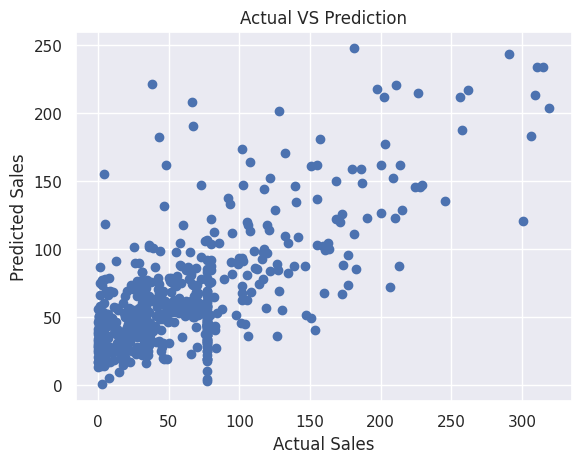

*****************************************************************************************
Scores for Lasso() are
Mean Absolute Error: 32.10514956935444
Mean Squared Error: 1768.3005922434024
Root Mean Squared Error: 42.051166360083315
R squared score:  0.5047037115581656
Cross Validation Score is : [0.43797049 0.45270675 0.37544241 0.51920889 0.46497848]
Mean Score : 0.4500614031347078
Difference : -0.0546423084234578


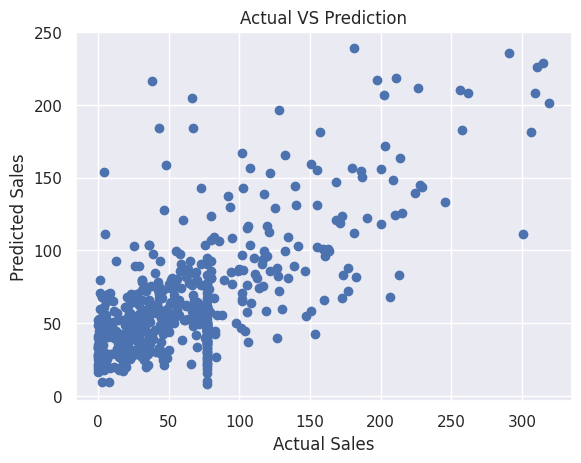

*****************************************************************************************
Scores for SVR() are
Mean Absolute Error: 37.79652429931766
Mean Squared Error: 2963.463960703351
Root Mean Squared Error: 54.437707158764056
R squared score:  0.16994163373244542
Cross Validation Score is : [0.17925094 0.08735709 0.12331232 0.10120997 0.10010412]
Mean Score : 0.1182468897388402
Difference : -0.05169474399360521


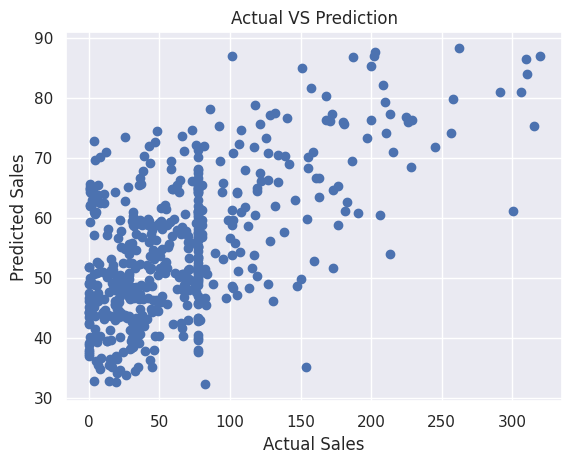

*****************************************************************************************
Scores for DecisionTreeRegressor() are
Mean Absolute Error: 42.621750372564755
Mean Squared Error: 3629.6070450811976
Root Mean Squared Error: 60.24622017256517
R squared score:  -0.016643270842493507
Cross Validation Score is : [-0.03319857  0.28729541  0.15937762 -0.00971679 -0.03850813]
Mean Score : 0.07304990920903527
Difference : 0.08969318005152878


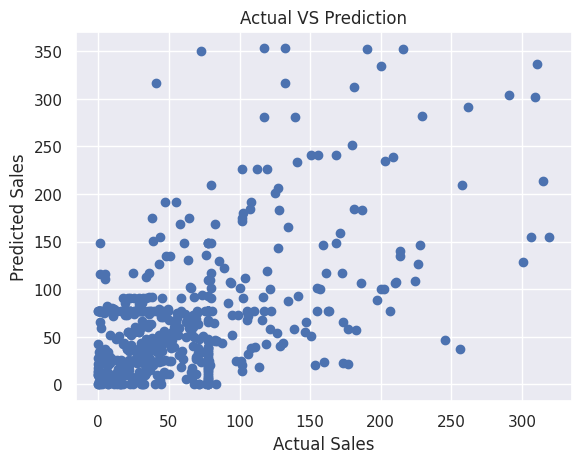

*****************************************************************************************
Scores for RandomForestRegressor() are
Mean Absolute Error: 28.18866404083431
Mean Squared Error: 1446.1962411931245
Root Mean Squared Error: 38.02888693076783
R squared score:  0.594924282803786
Cross Validation Score is : [0.51514503 0.57522579 0.53136142 0.61797642 0.50046671]
Mean Score : 0.5480350739586372
Difference : -0.0468892088451488


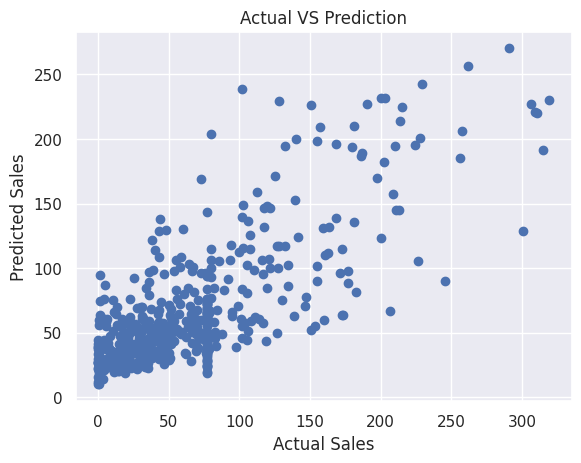

*****************************************************************************************
Scores for GradientBoostingRegressor() are
Mean Absolute Error: 26.63489653957968
Mean Squared Error: 1239.807830748435
Root Mean Squared Error: 35.2109049975776
R squared score:  0.6527331271366241
Cross Validation Score is : [0.55167693 0.5682022  0.51399189 0.62166418 0.47797762]
Mean Score : 0.5467025642307586
Difference : -0.10603056290586554


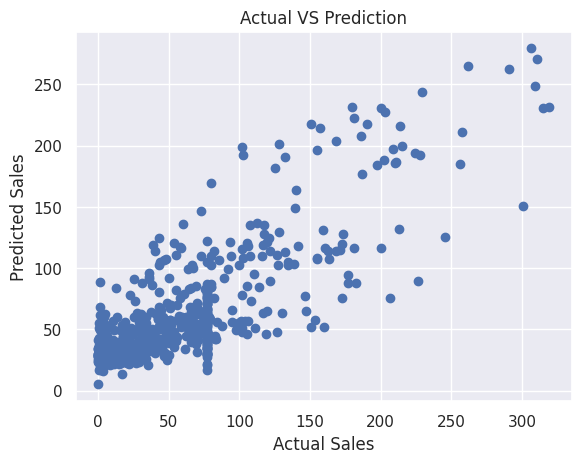

*****************************************************************************************


In [60]:
model=[lr,lasso,svr,dtr,rfr,gbr]
for m in model:
    m.fit(train_x,train_y)
    m.score(train_x,train_y)
    predm=m.predict(test_x)
    print(f"Scores for {m} are")
    print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, predm))
    print('Mean Squared Error:', metrics.mean_squared_error(test_y, predm))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, predm)))
    print('R squared score: ', r2_score(test_y, predm))
    score=cross_val_score(m,train_x,train_y,cv=5)
    print("Cross Validation Score is :",score)
    print("Mean Score :",score.mean())
    print("Difference :",score.mean()-r2_score(test_y, predm))
    plt.scatter(test_y, predm)
    plt.xlabel("Actual Sales")
    plt.ylabel("Predicted Sales")
    plt.title("Actual VS Prediction")
    plt.show()
    print("*****************************************************************************************")

# Hyperparamter Tuning and treating overfitting/underfitting

In [61]:
gbr.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [62]:
param ={
       'loss':['squared_error', 'absolute_error', 'huber', 'quantile'],

     'n_estimators':[50,100,200],
    'criterion':['friedman_mse', 'squared_error'],
    'max_depth':[1,2],
    "min_samples_split":[2,3]
}

In [63]:
gv=GridSearchCV(gbr,param, refit=True)
gv.fit(train_x,train_y)
gv.best_params_

{'criterion': 'friedman_mse',
 'loss': 'huber',
 'max_depth': 2,
 'min_samples_split': 3,
 'n_estimators': 200}

In [64]:
GB= GradientBoostingRegressor(criterion= 'squared_error',learning_rate= 0.2,loss= 'squared_error',min_samples_split= 2,max_depth= 2,n_estimators= 200)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=68)
GB.fit(x_train,y_train)
GB_predict_train=GB.predict(x_train)
GB_predict_test=GB.predict(x_test)
print('The r2 score is:', r2_score(y_test, GB_predict_test))
print('The mean absolute error', mean_absolute_error(y_test, GB_predict_test))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(y_test,GB_predict_test)))

The r2 score is: 0.5368835394653988
The mean absolute error 28.450752830197384
root_mean_squared_error: 38.360375302918534


In [65]:
import joblib
joblib.dump(GB,"gross_collection.obj")

['gross_collection.obj']

In [66]:
GB_l=joblib.load('gross_collection.obj')

# model for Number of votes.

#### Scaling of Independent

In [67]:
X=dfn.drop(["votes"],axis=1)
y=dfn["votes"]
st=StandardScaler()
xf=st.fit_transform(X)
x=pd.DataFrame(data=xf, columns=X.columns)

#### Predicting the best random state

In [68]:
LR = LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=i)
    LR.fit(x_train,y_train)
    LR_predict_train=LR.predict(x_train)
    LR_predict_test=LR.predict(x_test)
    print(f'At random state {i}, The training accuracy is :{r2_score(y_train,LR_predict_train)}')
    print(f'At random state {i}, The test accuracy is :{r2_score(y_test,LR_predict_test)}')
    print('\n')

At random state 0, The training accuracy is :0.5152530804072021
At random state 0, The test accuracy is :0.5264164590426945


At random state 1, The training accuracy is :0.5392240409687326
At random state 1, The test accuracy is :0.48381075128520734


At random state 2, The training accuracy is :0.5231483439089823
At random state 2, The test accuracy is :0.5142714389324554


At random state 3, The training accuracy is :0.5419758222280242
At random state 3, The test accuracy is :0.47545981362728384


At random state 4, The training accuracy is :0.48253148148937874
At random state 4, The test accuracy is :0.5782931069629387


At random state 5, The training accuracy is :0.5285499399971026
At random state 5, The test accuracy is :0.5004383917722142


At random state 6, The training accuracy is :0.5621887639423853
At random state 6, The test accuracy is :0.42339597211355573


At random state 7, The training accuracy is :0.5337546603687713
At random state 7, The test accuracy is :0.4886952

In [69]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.33,random_state=1)
print (train_x.shape, train_y.shape)
print (test_x.shape, test_y.shape)

(1086, 14) (1086,)
(535, 14) (535,)


Scores for LinearRegression() are
Mean Absolute Error: 80589.00856274336
Mean Squared Error: 13444879540.981806
Root Mean Squared Error: 115952.05707956114
R squared score:  0.48381075128520734
Cross Validation Score is : [0.53172486 0.45163332 0.56126074 0.40135785 0.60977182]
Mean Score : 0.5111497179382125
Difference : 0.02733896665300517


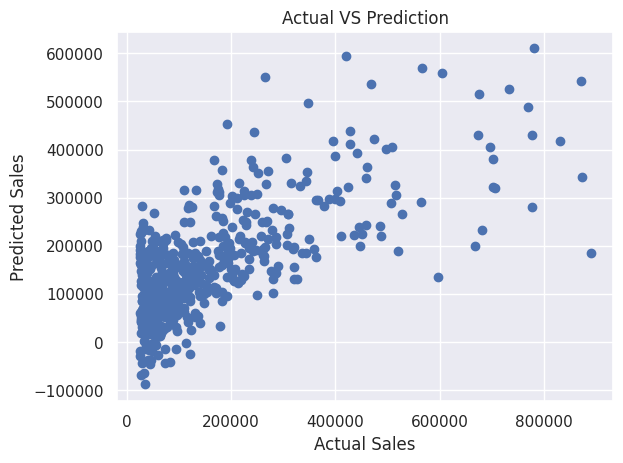

Scores for Lasso() are
Mean Absolute Error: 80588.73680098122
Mean Squared Error: 13444876223.532824
Root Mean Squared Error: 115952.04277429882
R squared score:  0.4838108786520232
Cross Validation Score is : [0.53172519 0.45163305 0.56126306 0.40136589 0.60977487]
Mean Score : 0.5111524100146053
Difference : 0.027341531362582105


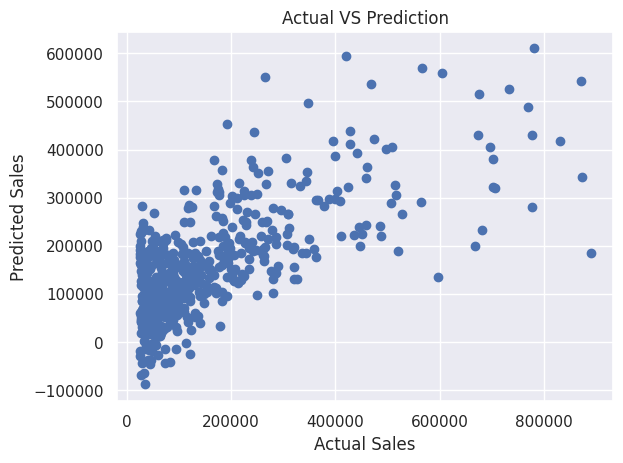

Scores for SVR() are
Mean Absolute Error: 105908.62992302423
Mean Squared Error: 30349590908.990585
Root Mean Squared Error: 174211.33978300777
R squared score:  -0.16521181780473904
Cross Validation Score is : [-0.11479916 -0.23114015 -0.27880331 -0.09510074 -0.09749036]
Mean Score : -0.1634667460100217
Difference : 0.0017450717947173344


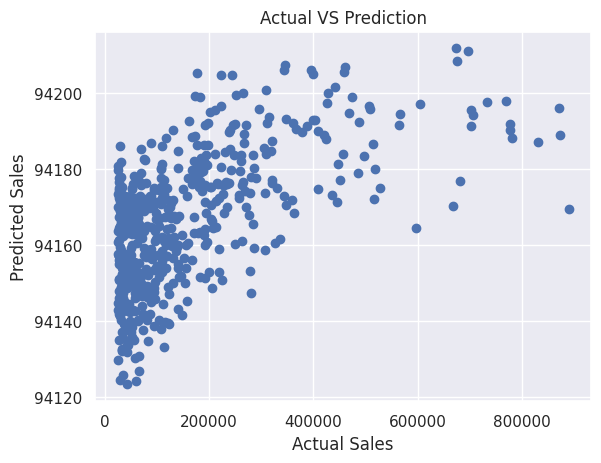

Scores for DecisionTreeRegressor() are
Mean Absolute Error: 85855.89158878505
Mean Squared Error: 16983570911.899065
Root Mean Squared Error: 130321.03019811909
R squared score:  0.34794977650893855
Cross Validation Score is : [0.44218196 0.41495867 0.48193476 0.3019405  0.62476905]
Mean Score : 0.45315698796942633
Difference : 0.10520721146048778


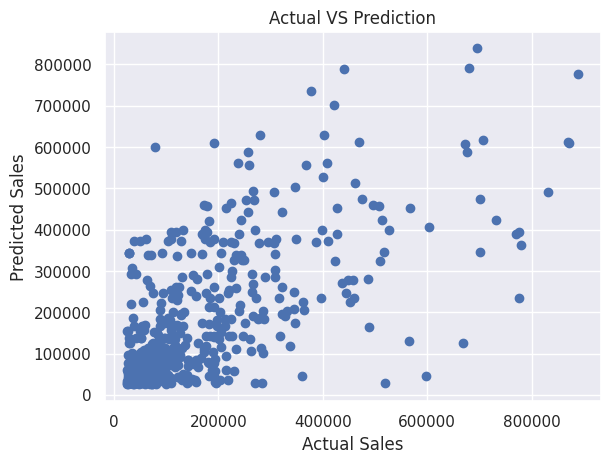

Scores for RandomForestRegressor() are
Mean Absolute Error: 63316.881214953275
Mean Squared Error: 8960710984.342054
Root Mean Squared Error: 94661.03202660562
R squared score:  0.655971430844062
Cross Validation Score is : [0.71003357 0.65814552 0.73246694 0.62207171 0.7522096 ]
Mean Score : 0.6949854676848302
Difference : 0.03901403684076821


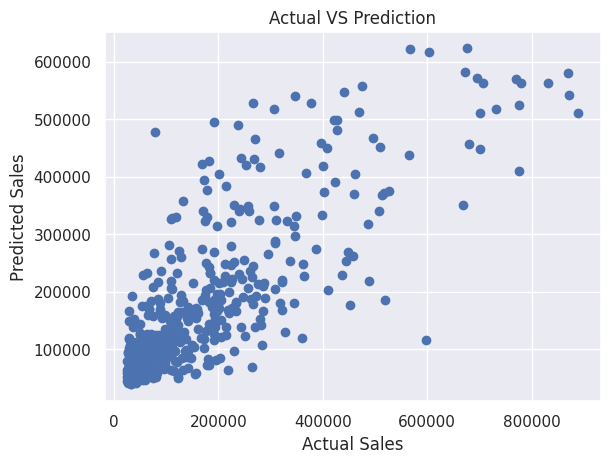

Scores for GradientBoostingRegressor() are
Mean Absolute Error: 58808.31203265863
Mean Squared Error: 7834987166.995641
Root Mean Squared Error: 88515.46286946502
R squared score:  0.6991913444003838
Cross Validation Score is : [0.74731126 0.68497553 0.72889507 0.67869606 0.78485058]
Mean Score : 0.7249456995796006
Difference : 0.02575435517921687


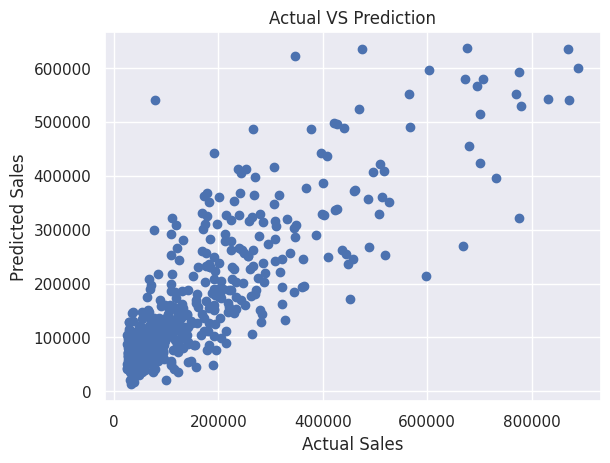

In [70]:
model=[lr,lasso,svr,dtr,rfr,gbr]
for m in model:
    m.fit(train_x,train_y)
    m.score(train_x,train_y)
    predm=m.predict(test_x)
    print(f"Scores for {m} are")
    print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, predm))
    print('Mean Squared Error:', metrics.mean_squared_error(test_y, predm))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, predm)))
    print('R squared score: ', r2_score(test_y, predm))
    score=cross_val_score(m,train_x,train_y,cv=5)
    print("Cross Validation Score is :",score)
    print("Mean Score :",score.mean())
    print("Difference :",score.mean()-r2_score(test_y, predm))
    plt.scatter(test_y, predm)
    plt.xlabel("Actual Sales")
    plt.ylabel("Predicted Sales")
    plt.title("Actual VS Prediction")
    plt.show()
    print("==================================================================================================")

# Hyperparamter Tuning and treating overfitting/underfitting

In [71]:
param1 ={
       'loss':['squared_error', 'absolute_error', 'huber', 'quantile'],
      'learning_rate':[0.1,0.2],
     'n_estimators':[50,100,200],
    'criterion':['friedman_mse', 'squared_error'],
    'max_depth':[1,2],
    "min_samples_split":[2,3],
    'min_samples_leaf':[1,2]
}

In [72]:
gv=GridSearchCV(gbr,param1, refit=True)
gv.fit(train_x,train_y)
gv.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.2,
 'loss': 'huber',
 'max_depth': 2,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [73]:
GB1= GradientBoostingRegressor(criterion='squared_error',
 learning_rate= 0.2,
 loss='huber',
 max_depth= 2,
 min_samples_leaf=2,
 min_samples_split= 2,
 n_estimators= 200)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=1)
GB1.fit(x_train,y_train)
GB1_predict_train=GB1.predict(x_train)
GB1_predict_test=GB1.predict(x_test)
print('The r2 score is:', r2_score(y_test, GB1_predict_test))
print('The mean absolute error', mean_absolute_error(y_test, GB1_predict_test))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(y_test,GB1_predict_test)))

The r2 score is: 0.6880548040076284
The mean absolute error 59815.06805005537
root_mean_squared_error: 90139.08210634724


In [74]:
import joblib
joblib.dump(GB1,"votes.obj")

['votes.obj']

In [75]:
GB1_l=joblib.load('votes.obj')